In [29]:
import string
from collections import Counter
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [30]:
cipher ="""
wsam ie pjo ysgtm eyipbya .P axg niphay y,
        mey syw ahgm ewhrg tw hmysyam wh meyiepjo
        ys .Ag jygtmeyk pmys ie pjo ysavw kkoyjgsy
        whmy sy amwh rmephmewagh y!Me yigu ynay utg
        smew ajya apr ywap awjfkya no a mwmnmw
        ghiwfeyswhve wieuwr wm aepby oyyhae wtmy
        uox8 fkpiya. Me y fpaavgs uwa mxSrN03u wd
        dvwmegnmmey dngmya. Mew awameyt"""

In [31]:
# Strip all punctuation from string and make upper case
encrypted_string = cipher.translate(str.maketrans(dict.fromkeys(string.punctuation))).replace('\n','').replace(' ','').replace('0','').replace('3','').replace('8','').upper()

In [32]:
encrypted_string

'WSAMIEPJOYSGTMEYIPBYAPAXGNIPHAYYMEYSYWAHGMEWHRGTWHMYSYAMWHMEYIEPJOYSAGJYGTMEYKPMYSIEPJOYSAVWKKOYJGSYWHMYSYAMWHRMEPHMEWAGHYMEYIGUYNAYUTGSMEWAJYAAPRYWAPAWJFKYANOAMWMNMWGHIWFEYSWHVEWIEUWRWMAEPBYOYYHAEWTMYUOXFKPIYAMEYFPAAVGSUWAMXSRNUWDDVWMEGNMMEYDNGMYAMEWAWAMEYT'

In [33]:
cnt = Counter().update({x:0 for x in string.ascii_uppercase})
encrypted_string_freq = dict(sorted(Counter(encrypted_string).items(),key=lambda x: x[1], reverse=True))
encrypted_string_percentages = dict(sorted({key:encrypted_string_freq[key]*100/float(len(encrypted_string)) for key in encrypted_string_freq.keys()}.items(),key=lambda x: x[1], reverse=True))

In [34]:
cnt = Counter()
cnt.update({x:0 for x in string.ascii_uppercase})
cnt.update(encrypted_string)
encrypted_string_freq = dict(sorted(cnt.items(),key=lambda x: x[1], reverse=True))
encrypted_string_percentages = dict(sorted({key:encrypted_string_freq[key]*100/float(len(encrypted_string)) for key in encrypted_string_freq.keys()}.items(),key=lambda x: x[1], reverse=True))

In [35]:
with open('english_monogram.json') as json_file: 
    english_monogram = json.load(json_file)

In [37]:
with open('english_bigrams.txt') as file:
    lines = file.read().splitlines()
    total = sum([int(x.split()[1]) for x in lines ])
    english_bigram = {x.split()[0]:float(x.split()[1])/total for x in lines}

In [212]:
with open('english_words.txt') as file:
    english_words = [word.upper() for word in file.read().splitlines()]
with open('golden_words.txt') as file:
    golden_words = [word.upper() for word in file.read().splitlines()]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


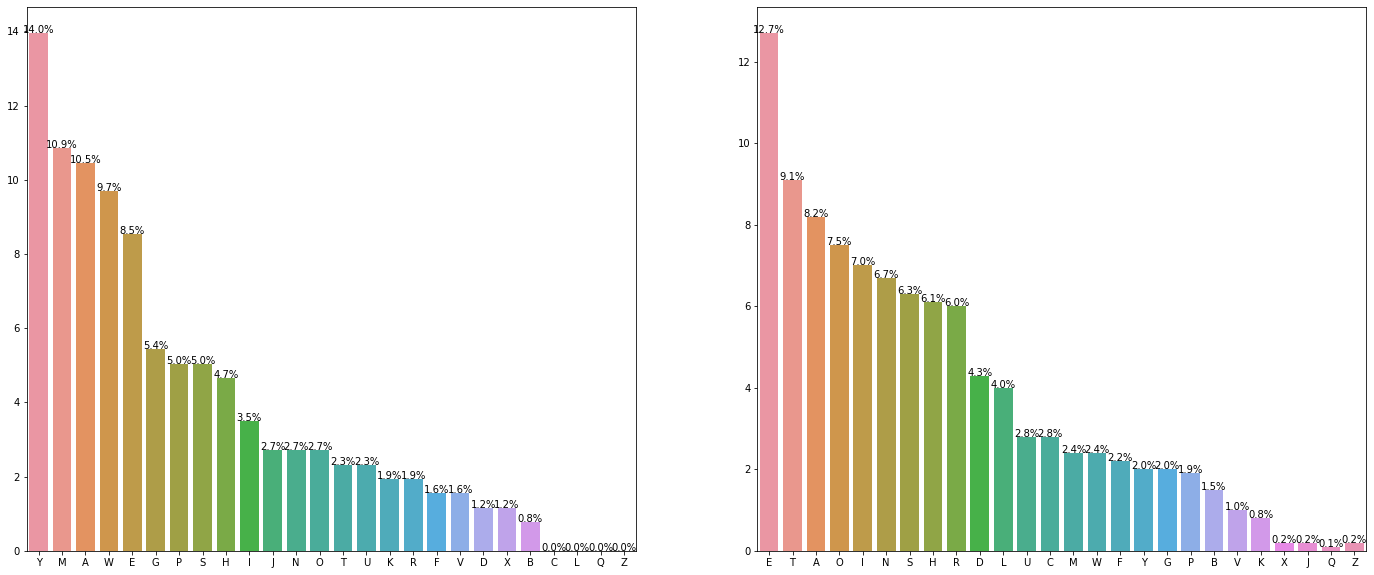

In [36]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(24,10))
sns.barplot(list(encrypted_string_percentages.keys()), list(encrypted_string_percentages.values()),ax=ax1)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
sns.barplot(list(english_monogram.keys()), list(english_monogram.values()),ax=ax2)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
fig.show()

In [92]:
Counter(map(''.join, zip(encrypted_string,encrypted_string[1:]))).most_common(15)

[('ME', 14),
 ('EY', 9),
 ('AM', 8),
 ('YS', 8),
 ('YA', 7),
 ('WA', 7),
 ('EW', 6),
 ('WH', 6),
 ('EP', 5),
 ('OY', 5),
 ('MY', 5),
 ('IE', 4),
 ('SY', 4),
 ('HM', 4),
 ('MW', 4)]

In [ ]:
# By comparing this data with the orignal data of bigrams it is quite easy to realize the following mapping Y->E,S->R,M->T,E->H,A->S

In [221]:
decrypt_key = {list(encrypted_string_percentages.keys())[i]:list(english_monogram.keys())[i] for i in range(len(encrypted_string_percentages.keys()))}

In [222]:
decrypt_key['A'], decrypt_key['P'] = decrypt_key['P'], decrypt_key['A']
decrypt_key['E'], decrypt_key['S'] = decrypt_key['S'], decrypt_key['E']
decrypt_key['H'], decrypt_key['S'] = decrypt_key['S'], decrypt_key['H']

In [223]:
non_swappable = ['Y','S','M','E','A']

In [224]:
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'X',
 'D': 'B',
 'E': 'H',
 'F': 'G',
 'G': 'N',
 'H': 'I',
 'I': 'D',
 'J': 'L',
 'K': 'F',
 'L': 'J',
 'M': 'T',
 'N': 'U',
 'O': 'C',
 'P': 'A',
 'Q': 'Q',
 'R': 'Y',
 'S': 'R',
 'T': 'M',
 'U': 'W',
 'V': 'P',
 'W': 'O',
 'X': 'V',
 'Y': 'E',
 'Z': 'Z'}

In [225]:
def score_text(text, letter_percents, bigram_percents,english_words,golden_words,letter_weight=1.0,bigram_weight=1.0,word_weight=10.0,golden_weight=5000.0):
    total_weight = letter_weight + bigram_weight + word_weight + golden_weight
    letter_weight = letter_weight / total_weight
    bigram_weight = bigram_weight / total_weight
    word_weight = word_weight / total_weight
    golden_weight = golden_weight / total_weight

    total_logprob = 0
    for c1, c2 in zip(text[:-1], text[1:]):
        letter_prob = letter_percents[c1]/100
        bigram_prob = bigram_percents[c1 + c2]/100
        total_logprob += math.log(
            letter_weight * letter_prob +
            bigram_weight * bigram_prob
        )
    word_score = sum([len(x)*word_weight if x in text else 0 for x in english_words])
    golden_score = sum([len(x)*golden_weight if x in text else 0 for x in golden_words])
    return total_logprob + math.log(word_score + golden_score + 0.1) 

In [226]:
score_text(encrypted_string,english_monogram,english_bigram,english_words,golden_words)

-3064.9592166556254

In [227]:
def optimize_key(encrypted_string,decrypt_key,letter_percents, bigram_percents,english_words,golden_words):
    iterations = int(1e4)
    print_every = 1000 
    best_score =  score_text(encrypted_string, letter_percents, bigram_percents,english_words,golden_words)
    for iter_num in range(iterations):
        a, b = swapper()
        decrypt_key[a], decrypt_key[b] = decrypt_key[b], decrypt_key[a]
        current_decrypt = decrypt(decrypt_key,encrypted_string)
        new_score = score_text(current_decrypt, letter_percents, bigram_percents,english_words,golden_words)
        if new_score > best_score:
            best_score = new_score
        else:
            # Swap back
            decrypt_key[a], decrypt_key[b] = decrypt_key[b], decrypt_key[a]
        # Check progress
        if iter_num % print_every == 0:
            print('{n}: {d}'.format(n=iter_num,
                                d=current_decrypt))

In [187]:
def swapper():
  char = random.choice(string.ascii_uppercase.translate(str.maketrans({char:'' for char in non_swappable})))
  char_list = list(encrypted_string_percentages.keys())
  char_index = char_list.index(char)
  chars_in_vicinity = [list(encrypted_string_percentages.keys())[x]  for x in range(0,26) if ( abs(x-char_index)<=3 and char_list[x] != char and (char_list[x] not in non_swappable))]
  return char,random.choice(chars_in_vicinity)

In [188]:
def decrypt(decrypt_key,encrypted_string):
    return "".join([ decrypt_key[x] if x in decrypt_key.keys() else x for x in encrypted_string])

In [228]:
optimize_key(encrypted_string,decrypt_key,english_monogram,english_bigram,english_words,golden_words)

0: ORSTDHALCERNMTHEDAKESASVNUDAISEETHEREOSINTHOIYNMOITERESTOITHEDHALCERSNLENMTHEFATERDHALCERSPOFFCELNREOITERESTOIYTHAITHOSNIETHEDNWEUSEWMNRTHOSLESSAYEOSASOLGFESUCSTOTUTONIDOGHEROIPHODHWOYOTSHAKECEEISHOMTEWCVGFADESTHEGASSPNRWOSTVRYUWOBBPOTHNUTTHEBUNTESTHOSOSTHEM
1000: IRSTDHOCLERAFTHEDOKESOSVAUDONSEETHEREISNATHINGAFINTERESTINTHEDHOCLERSACEAFTHEMOTERDHOCLERSPIMMLECAREINTERESTINGTHONTHISANETHEDAWEUSEWFARTHISCESSOGEISOSICYMESULSTITUTIANDIYHERINPHIDHWIGITSHOKELEENSHIFTEWLVYMODESTHEYOSSPARWISTVRGUWIBBPITHAUTTHEBUATESTHISISTHEF
2000: IRSTDHOCLERAFTHEDOKESOSPAUDONSEETHEREISNATHINGAFINTERESTINTHEDHOCLERSACEAFTHEMOTERDHOCLERSBIMMLECAREINTERESTINGTHONTHISANETHEDAWEUSEWFARTHISCESSOGEISOSICYMESULSTITUTIANDIYHERINBHIDHWIGITSHOKELEENSHIFTEWLPYMODESTHEYOSSBARWISTPRGUWIVVBITHAUTTHEVUATESTHISISTHEF
3000: IRSTDHOCLERAGTHEDOKESOSBAUDONSEETHEREISNATHINFAGINTERESTINTHEDHOCLERSACEAGTHEMOTERDHOCLERSPIMMLECAREINTERESTINFTHONTHISANETHEDAWEUSEWGARTHISCESSOFEISOSICYMESULSTITUTIANDIYHERINPHIDHWIFITSHOKELEENSHIGTEW

In [ ]:
# Now we can see a very good phrase starting from the end 'THISISTHELIRST' -> 'THISISTHEFIRST' , 'INTERESTINGTHONTHIS -> THAN THIS, so we have 2 more keys

In [229]:
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'Y',
 'G': 'A',
 'H': 'N',
 'I': 'D',
 'J': 'C',
 'K': 'M',
 'L': 'J',
 'M': 'T',
 'N': 'U',
 'O': 'L',
 'P': 'O',
 'Q': 'Q',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'W',
 'V': 'P',
 'W': 'I',
 'X': 'B',
 'Y': 'E',
 'Z': 'X'}

In [231]:
backup = decrypt_key.copy()

In [247]:
decrypt_key['O'],decrypt_key['T'] = decrypt_key['T'],decrypt_key['O']

In [248]:
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'Y',
 'G': 'A',
 'H': 'N',
 'I': 'D',
 'J': 'C',
 'K': 'M',
 'L': 'J',
 'M': 'T',
 'N': 'U',
 'O': 'L',
 'P': 'O',
 'Q': 'Q',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'W',
 'V': 'P',
 'W': 'I',
 'X': 'B',
 'Y': 'E',
 'Z': 'X'}

In [234]:
non_swappable.append('T')

In [243]:
decrypt(decrypt_key,encrypted_string)

'IRSTDHOCLERAFTHEDOKESOSBAUDONSEETHEREISNATHINGAFINTERESTINTHEDHOCLERSACEAFTHEMOTERDHOCLERSPIMMLECAREINTERESTINGTHONTHISANETHEDAWEUSEWFARTHISCESSOGEISOSICYMESULSTITUTIANDIYHERINPHIDHWIGITSHOKELEENSHIFTEWLBYMODESTHEYOSSPARWISTBRGUWIVVPITHAUTTHEVUATESTHISISTHEF'

In [250]:
optimize_key(encrypted_string,decrypt_key,english_monogram,english_bigram,english_words,golden_words)

0: IRSTDHOCLERAFTHEDOZESOSBAUDONSEETHEREISNATHINGAFINTERESTINTHEDHOCLERSACEAFTHEMOTERDHOCLERSPIMMLECAREINTERESTINGTHONTHISANETHEDAWEUSEWFARTHISCESSOGEISOSICYMESULSTITUTIANDIYHERINPHIDHWIGITSHOZELEENSHIFTEWLBYMODESTHEYOSSPARWISTBRGUWIVVPITHAUTTHEVUATESTHISISTHEF
1000: IRSTDHOCLERAFTHEDOKESOSBAUDONSEETHEREISNATHINGAFINTERESTINTHEDHOCLERSACEAFTHEWOTERDHOCLERSPIWWLECAREINTERESTINGTHONTHISANETHEDAMEUSEMFARTHISCESSOGEISOSICYWESULSTITUTIANDIYHERINPHIDHMIGITSHOKELEENSHIFTEMLBYWODESTHEYOSSPARMISTBRGUMIVVPITHAUTTHEVUATESTHISISTHEF
2000: IRSTDHOCLERNFTHEDOKESOSBNUDOASEETHEREISANTHIAGNFIATERESTIATHEDHOCLERSNCENFTHEMOTERDHOCLERSPIMMLECNREIATERESTIAGTHOATHISNAETHEDNWEUSEWFNRTHISCESSOGEISOSICYMESULSTITUTINADIYHERIAPHIDHWIGITSHOKELEEASHIFTEWLBYMODESTHEYOSSPNRWISTBRGUWIVVPITHNUTTHEVUNTESTHISISTHEF
3000: IRSTDHOCLERAFTHEDOKESOSBAWDONSEETHEREISNATHINGAFINTERESTINTHEDHOCLERSACEAFTHEMOTERDHOCLERSPIMMLECAREINTERESTINGTHONTHISANETHEDAUEWSEUFARTHISCESSOGEISOSICYMESWLSTITWTIANDIYHERINPHIDHUIGITSHOKELEENSHIFTEU

In [199]:
# We now again see 'NATHING->NOTHING'

In [251]:
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'Y',
 'G': 'A',
 'H': 'N',
 'I': 'D',
 'J': 'C',
 'K': 'M',
 'L': 'J',
 'M': 'T',
 'N': 'U',
 'O': 'L',
 'P': 'O',
 'Q': 'Q',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'W',
 'V': 'P',
 'W': 'I',
 'X': 'B',
 'Y': 'E',
 'Z': 'X'}

In [252]:
decrypt_key['G'],decrypt_key['P'] = decrypt_key['P'],decrypt_key['G']

In [254]:
decrypt(decrypt_key,encrypted_string)

'IRSTDHACLEROFTHEDAKESASBOUDANSEETHEREISNOTHINGOFINTERESTINTHEDHACLERSOCEOFTHEMATERDHACLERSPIMMLECOREINTERESTINGTHANTHISONETHEDOWEUSEWFORTHISCESSAGEISASICYMESULSTITUTIONDIYHERINPHIDHWIGITSHAKELEENSHIFTEWLBYMADESTHEYASSPORWISTBRGUWIVVPITHOUTTHEVUOTESTHISISTHEF'

In [255]:
# Big Find -> SULSTITUTIONDIYHER -> SUBSTITUTIONCIPHER
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'Y',
 'G': 'O',
 'H': 'N',
 'I': 'D',
 'J': 'C',
 'K': 'M',
 'L': 'J',
 'M': 'T',
 'N': 'U',
 'O': 'L',
 'P': 'A',
 'Q': 'Q',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'W',
 'V': 'P',
 'W': 'I',
 'X': 'B',
 'Y': 'E',
 'Z': 'X'}

In [256]:
decrypt_key['O'],decrypt_key['X'] = decrypt_key['X'],decrypt_key['O']

In [258]:
decrypt_key['I'],decrypt_key['J'] = decrypt_key['J'],decrypt_key['I']

In [260]:
decrypt_key['F'],decrypt_key['V'] = decrypt_key['V'],decrypt_key['F']

In [262]:
decrypt(decrypt_key,encrypted_string)

'IRSTCHADBEROFTHECAKESASLOUCANSEETHEREISNOTHINGOFINTERESTINTHECHADBERSODEOFTHEMATERCHADBERSYIMMBEDOREINTERESTINGTHANTHISONETHECOWEUSEWFORTHISDESSAGEISASIDPMESUBSTITUTIONCIPHERINYHICHWIGITSHAKEBEENSHIFTEWBLPMACESTHEPASSYORWISTLRGUWIVVYITHOUTTHEVUOTESTHISISTHEF'

In [264]:
non_swappable.append('G')
non_swappable.append('I')
non_swappable.append('O')
non_swappable.append('F')

In [265]:
non_swappable

['Y', 'S', 'M', 'E', 'A', 'T', 'G', 'I', 'O', 'F']

In [267]:
optimize_key(encrypted_string,decrypt_key,english_monogram,english_bigram,english_words,golden_words)

0: IRSTCHADBEROFTHECAKESASYOUCANSEETHEREISNOTHINWOFINTERESTINTHECHADBERSODEOFTHEGATERCHADBERSMIGGBEDOREINTERESTINWTHANTHISONETHECOLEUSELFORTHISDESSAWEISASIDPGESUBSTITUTIONCIPHERINMHICHLIWITSHAKEBEENSHIFTELBYPGACESTHEPASSMORLISTYRWULIVVMITHOUTTHEVUOTESTHISISTHEF
1000: IRSTCHADBEROFTHECAKESASYOUCANSEETHEREISNOTHINWOFINTERESTINTHECHADBERSODEOFTHEGATERCHADBERSMIGGBEDOREINTERESTINWTHANTHISONETHECOLEUSELFORTHISDESSAWEISASIDPGESUBSTITUTIONCIPHERINMHICHLIWITSHAKEBEENSHIFTELBYPGACESTHEPASSMORLISTYRWULIVVMITHOUTTHEVUOTESTHISISTHEF
2000: IRSTCHADBEROFTHECAKESASYOUCANSEETHEREISNOTHINWOFINTERESTINTHECHADBERSODEOFTHELATERCHADBERSGILLBEDOREINTERESTINWTHANTHISONETHECOMEUSEMFORTHISDESSAWEISASIDPLESUBSTITUTIONCIPHERINGHICHMIWITSHAKEBEENSHIFTEMBYPLACESTHEPASSGORMISTYRWUMIVVGITHOUTTHEVUOTESTHISISTHEF
3000: IRSTCHADBEROFTHECAKESASYOUCANSEETHEREISNOTHINWOFINTERESTINTHECHADBERSODEOFTHEMATERCHADBERSVIMMBEDOREINTERESTINWTHANTHISONETHECOLEUSELFORTHISDESSAWEISASIDPMESUBSTITUTIONCIPHERINVHICHLIWITSHAKEBEENSHIFTEL

In [268]:
# More clues CHADBER MAPS TO CHAMBER AND WE GET A NEAT LINE "AS YOU CAN SEE THERE IS NOTHING OF INTEREST IN THE CHAMBER"
# MORE CORRECTIONS
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'P',
 'G': 'O',
 'H': 'N',
 'I': 'C',
 'J': 'D',
 'K': 'M',
 'L': 'Q',
 'M': 'T',
 'N': 'U',
 'O': 'B',
 'P': 'A',
 'Q': 'J',
 'R': 'W',
 'S': 'R',
 'T': 'F',
 'U': 'L',
 'V': 'G',
 'W': 'I',
 'X': 'Y',
 'Y': 'E',
 'Z': 'X'}

In [269]:
decrypt_key['J'],decrypt_key['K'] = decrypt_key['K'],decrypt_key['J']
non_swappable.append('J')

In [271]:
decrypt_key['V'],decrypt_key['X'] = decrypt_key['X'],decrypt_key['V']
non_swappable.append('V')

In [274]:
decrypt_key['R'],decrypt_key['X'] = decrypt_key['X'],decrypt_key['R']
non_swappable.append('R')

In [283]:
decrypt(decrypt_key,encrypted_string)

'IRSTCHAMBEROFTHECAKESASYOUCANSEETHEREISNOTHINGOFINTERESTINTHECHAMBERSOMEOFTHEDATERCHAMBERSWIDDBEMOREINTERESTINGTHANTHISONETHECOLEUSELFORTHISMESSAGEISASIMPDESUBSTITUTIONCIPHERINWHICHLIGITSHAKEBEENSHIFTELBYPDACESTHEPASSWORLISTYRGULIVVWITHOUTTHEVUOTESTHISISTHEF'

In [282]:
# We can now see the entire string forming, infact we see the word password forming

In [284]:
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'P',
 'G': 'O',
 'H': 'N',
 'I': 'C',
 'J': 'M',
 'K': 'D',
 'L': 'Q',
 'M': 'T',
 'N': 'U',
 'O': 'B',
 'P': 'A',
 'Q': 'J',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'L',
 'V': 'W',
 'W': 'I',
 'X': 'Y',
 'Y': 'E',
 'Z': 'X'}

In [285]:
decrypt_key['U'],decrypt_key['K'] = decrypt_key['K'],decrypt_key['U']


In [286]:
decrypt(decrypt_key,encrypted_string)

'IRSTCHAMBEROFTHECAKESASYOUCANSEETHEREISNOTHINGOFINTERESTINTHECHAMBERSOMEOFTHELATERCHAMBERSWILLBEMOREINTERESTINGTHANTHISONETHECODEUSEDFORTHISMESSAGEISASIMPLESUBSTITUTIONCIPHERINWHICHDIGITSHAKEBEENSHIFTEDBYPLACESTHEPASSWORDISTYRGUDIVVWITHOUTTHEVUOTESTHISISTHEF'

In [287]:
# Now we just plugin the final piece in the puzzle i.e. the mapping of the word cave which is shown cake
decrypt_key

{'A': 'S',
 'B': 'K',
 'C': 'Z',
 'D': 'V',
 'E': 'H',
 'F': 'P',
 'G': 'O',
 'H': 'N',
 'I': 'C',
 'J': 'M',
 'K': 'L',
 'L': 'Q',
 'M': 'T',
 'N': 'U',
 'O': 'B',
 'P': 'A',
 'Q': 'J',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'D',
 'V': 'W',
 'W': 'I',
 'X': 'Y',
 'Y': 'E',
 'Z': 'X'}

In [288]:
decrypt_key['B'],decrypt_key['D'] = decrypt_key['D'],decrypt_key['B']


In [289]:
decrypt(decrypt_key,encrypted_string)

'IRSTCHAMBEROFTHECAVESASYOUCANSEETHEREISNOTHINGOFINTERESTINTHECHAMBERSOMEOFTHELATERCHAMBERSWILLBEMOREINTERESTINGTHANTHISONETHECODEUSEDFORTHISMESSAGEISASIMPLESUBSTITUTIONCIPHERINWHICHDIGITSHAVEBEENSHIFTEDBYPLACESTHEPASSWORDISTYRGUDIKKWITHOUTTHEKUOTESTHISISTHEF'

In [291]:
# Voilaaaa!!!!!!! Just fix the last one it's quotes not kuotes!
decrypt_key['D'],decrypt_key['L'] = decrypt_key['L'],decrypt_key['D']
decrypt_key

{'A': 'S',
 'B': 'V',
 'C': 'Z',
 'D': 'Q',
 'E': 'H',
 'F': 'P',
 'G': 'O',
 'H': 'N',
 'I': 'C',
 'J': 'M',
 'K': 'L',
 'L': 'K',
 'M': 'T',
 'N': 'U',
 'O': 'B',
 'P': 'A',
 'Q': 'J',
 'R': 'G',
 'S': 'R',
 'T': 'F',
 'U': 'D',
 'V': 'W',
 'W': 'I',
 'X': 'Y',
 'Y': 'E',
 'Z': 'X'}

In [292]:
decrypt(decrypt_key,encrypted_string)

'IRSTCHAMBEROFTHECAVESASYOUCANSEETHEREISNOTHINGOFINTERESTINTHECHAMBERSOMEOFTHELATERCHAMBERSWILLBEMOREINTERESTINGTHANTHISONETHECODEUSEDFORTHISMESSAGEISASIMPLESUBSTITUTIONCIPHERINWHICHDIGITSHAVEBEENSHIFTEDBYPLACESTHEPASSWORDISTYRGUDIQQWITHOUTTHEQUOTESTHISISTHEF'

In [298]:
print(decrypt({**decrypt_key,**{x.lower():decrypt_key[x].lower() for x in decrypt_key.keys()}},cipher))


irst ch amb eroft hecaves .A syo ucanse e,
        the rei snot hingo fi nterest in thechamb
        er .So meofthel ater ch amb erswi llbemore
        inte re stin gthanthison e!Th ecod euse dfo
        rthi smes sag eisa simples ub s tituti
        oncipherinwh ichdig it shave beensh ifte
        dby8 places. Th e passwor dis tyRgU03d iq
        qwithoutthe quotes. Thi sisthef
